In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# import requests
import datetime
import numpy as np
from datetime import date
import matplotlib.ticker as ticker
# import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set_theme()
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

import plotly.express as px
import pmdarima as pm

In [34]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [35]:
df=pd.read_csv("dfdaily.csv")

## Exponential Smoothing

In [36]:
df.date=pd.to_datetime(df.date)

In [37]:
df=df.set_index("date")

In [38]:
train=df[:800]
test=df[800:]

In [54]:
from statsmodels.tsa.api import ExponentialSmoothing


es_model = ExponentialSmoothing(train, trend="add", damped_trend=True, seasonal="add", seasonal_periods=7).fit()
es_model.summary()

Dep. Variable:,Value,No. Observations:,800
Model:,ExponentialSmoothing,SSE,2693326.146
Optimized:,True,AIC,6521.341
Trend:,Additive,BIC,6577.556
Seasonal:,Additive,AICC,6521.876
Seasonal Periods:,7,Date:,"Mon, 12 Sep 2022"
Box-Cox:,False,Time:,19:24:26
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1581456,alpha,True
smoothing_trend,0.0052436,beta,True


In [40]:
fc=es_model.forecast(steps=len(test)+14)

In [41]:
simulations = es_model.simulate(52+14, repetitions=100)

In [42]:
pred_df=pd.DataFrame(fc,index=test.index,columns=["Forecast"])

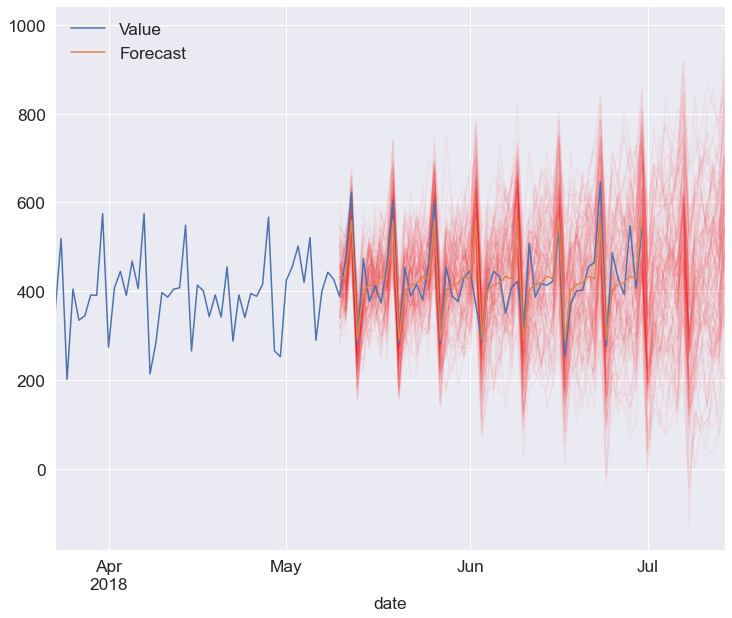

In [43]:
fig, ax = plt.subplots(figsize=(12, 10))
simulations.plot(ax=ax, style="-", alpha=0.05, color="red", legend=False)
df[-100:].plot(ax=ax)
pred_df.plot(ax=ax)
plt.show()

In [44]:
temp=pred_df.join(df)

In [53]:
rmse=sum((temp.Forecast-temp.Value)**2)**0.5
print(f"RMSE: {rmse}")

RMSE: 383.4710732364404


In [46]:
forecast=pd.DataFrame(fc[-14:],columns=["Forecast"])
meanfc=[simulations[-14:].iloc[i].mean() for i in range(14)]
stdfc=[simulations[-14:].iloc[i].std() for i in range(14)]

In [49]:
forecast["mean"]=meanfc
forecast["std"]=stdfc

In [50]:
forecast[["mean","std"]]

,mean,std
2018-07-01,289.739303,138.554437
2018-07-02,407.950826,140.859632
2018-07-03,418.859636,139.283081
2018-07-04,428.642376,148.435500
2018-07-05,450.126205,148.854055
2018-07-06,434.617113,161.669101
2018-07-07,570.433849,150.014458
2018-07-08,294.371974,153.764497
2018-07-09,406.665625,163.152943
2018-07-10,433.095078,155.680628
